# 4. Methods

Last updated 20190416TUE1200 20180409MON1222 20180318SUN0708

## 4.1 학습내용

### 4.1.1 목표

멤버함수를 다양하게 구현할 수 있다.
반환 값이 있는 함수와 없는 함수를 구현할 수 있다.
매개변수로 원시타잎, 객체를 넘겨서 함수를 다르게 구현할 수 있다. 함수를 오버로딩 할 수 있다.

* 목차
    * 함수구성
    * 함수의 signature
    * forward reference
    * void 함수와 값을 돌려주는 함수
    * pass-by-value, pass-by-reference
    * 변수의 범위 - 지역 변수
    * 오버로딩

### 4.1.2 문제

* 문제 4-1: 큰 숫자를 출력하는 함수 시그니처에 맞게 클래스 컴파일
```java
int larger(int a, int b);
```

* 문제 4-2: 사용자에게 수를 받아서 별(`*`)을 그 수만큼 반복 출력하는 함수
* 문제 4-3: 계산기 두 수를 받아서 더하기, 빼기, 곱하기, 나누기
* 문제 4-4: 삼각형 클래스를 만들고, 면적을 계산하기


## 4.2 함수 구성

### 정의부분 과 구현부분

어느 프로그래밍에서나 함수는 입력과 출력을 가진다. **입력에서 출력으로 변환하는 명령문을 묶어** 놓은 것이 함수라고 한다.
함수는 **정의부분**과 **구현부분**으로 나뉜다.
* 정의부분은 함수의 **헤더, header**라고 하고 **시그니처, Function Signiture**를 가진다.
* 구현부분은 함수헤더에서 제공된 매개변수를 사용해서 구현한 부분, 이를 **body**라고 한다. 자바에서는 **괄호 {} 안**에 있는 부분을 말한다.

![alt text](figures/4_headerBody.png "Function Header and Body")

#### 함수의 예 - 숫자 2개를 더하기

* header는 `int addTwoNumbers(int a, int b)`
* body는 `{ return a+b }`

```java
int addTwoNumbers(int a, int b) {
    return a+b;
}
```

###  함수는 왜 필요할까?

함수를 만드는 이유는 재사용이다. 
필요할 때마다 **새로 작성, rewriting**하는 것이 아니라 **쓰고 또 쓸 수 있게, reuse**하는 것이다.

또 **검증**이 함수를 만드는 이유이다. 처음 함수를 만들 때는 테스트하고 검증하는 시간과 노력이 많이 필요하다. 그러나 일단 만들어지고 나서는 튼튼한 함수가 되어 믿고 사용할 수 있게 된다.

일련의 코드가 자꾸 반복된다. 같은 프로그램뿐만 아니라, 다른 프로그램에서도 이런 현상이 있다면, 함수를 만들자.
함수를 만들고 나면, **코드 중복, Duplicate Code**이 줄어들고 이로 인해 프로그램이 수정노력이 훨씬 줄어들게 된다.



### 함수의 중복코드 예

아직 배우지는 않았지만, 배열을 합계내는 경우를 생각해 보자.
arr1, arr2는 데이터가 서로 다르다. **합계를 계산하는 코드가 중복**되어 있다.
배열이 많아질수록 코드 중복은 늘어나게 되어있다.
**배열의 크기를 구하는 요령, 'arr.lenght'**을 이용하면 함수로 만들어 코드 중복을 줄일 수 있다.

In [8]:
/set feedback off

 /set feedback off


In [5]:
int[] arr1={1,2,3,4}
int sum1=0;
for(int i=0;i<4;i++)
    sum1+=arr1[i]

System.out.println(sum1);

 int[] arr1={1,2,3,4}
 int sum1=0;
 for(int i=0;i<4;i++)
     sum1+=arr1[i]
 
 System.out.println(sum1);
10


비슷한 기능이 있는 경우, 상당히 많은 **중복**이 보인다.
중복이 발생하는 패턴을 살펴보면:
* 입력데이터를 정의하는 코드
* 입력데이터를 합계를 계산하는 코드

In [9]:
int[] arr2={1,2,3,4,5,6}
int sum2=0
for(int i=0;i<6;i++)
    sum2+=arr2[i]
System.out.println(sum2);

 int[] arr2={1,2,3,4,5,6}
 int sum2=0
 for(int i=0;i<6;i++)
     sum2+=arr2[i]
 System.out.println(sum2);
21


함수 sumOfArray()를 만들어 중복을 제거하였다.
**합계를 계산하는 코드를 함수로** 만들어 보자.
배열 데이터가 서로 다르고, 그 크기도 다른 경우 함수로 구현하려면 매개변수를 이용한다.
배열의 크기를 **arr.length**로 알아내어 크기가 다른 경우에도 계산할 수 있게 하였다.

In [11]:
int sumOfArray(int[] arr) {
    int sum=0;
    for(int i=0;i<arr.length;i++)
        sum+=arr[i];
    return sum;
}

 int sumOfArray(int[] arr) {
     int sum=0;
     for(int i=0;i<arr.length;i++)
         sum+=arr[i];
     return sum;
 }


In [12]:
int[] arr1={1,2,3,4}
int[] arr2={1,2,3,4,5,6}

int fsum1=sumOfArray(arr1);
int fsum2=sumOfArray(arr2);

System.out.println(fsum1);
System.out.println(fsum2);

 int[] arr1={1,2,3,4}
 int[] arr2={1,2,3,4,5,6}
 
 int fsum1=sumOfArray(arr1);
 int fsum2=sumOfArray(arr2);
 
 System.out.println(fsum1);
10
 System.out.println(fsum2);
21


## 4.3 시그니처

### 구성

시그니처는 **함수명, 매개변수, 반환타잎**을 말한다. 함수 이름을 짓고, 필요한 변수를 정확하게 적어야 한다.

```java
수식어 반환타잎 함수명(매개변수, ...)
```

구분 | 설명
-----|-----
함수명 | 목적을 포함하도록 의미있게, 동사+명사의 형식으로, camel case로 짓는다.
반환타잎 | return명령어로 함수 밖으로 돌려주는 데이터타잎
매개변수,... | 데이터타잎과 변수명과 함께 목록을 적는다.
수식어 | 가시성, static, final 등을 사용할 수 있다.

> 매개변수와 전달인자
>
> 한글로 인자는 모호하게 쓰이는 경우가 많다.
> 영어로 **parameter는 매개변수**, **argument는 전달인자**를 의미하기로 한다.
> 매개변수는 정의부분에 나열된 변수를 말한다. 데이터타잎과 함께 적는다.
> 전달인자는 함수를 호출할 때의 실제 값을 말한다.
> 두 수를 더하는 함수 addTwoNumbers(int a, int b)를 예로 설명하면, a, b는 매개변수
> add(1,2)의 1,2는 전달인자이다.

### 시그니처가 같아야 할까?

시그니처가 서로 같지 않으면 다른 함수로 인식한다. 즉 함수를 호출할 때 동일한 시그니처를 가졌는지 보고 호출한다.
그러나 객체지향에서는 함수명 또는 시그니처가 같아도 되는 경우가 있다. 뒤에 오버로딩, 오버라이딩에 대해 설명한다.


### 시그니처 예

위에서 예로 들었던 함수로 설명해보자. 매개변수가 원시타잎, 배열 등이 될 수 있다.

함수명 | addTwoNumbers | sumOfArray
-----|-----|-----
매개변수 | int a, int b | int[]
반환타잎 | int | int
전달인자 | 1,2 | int[] a={1,2,3}과 같이 배열 값

In [23]:
int addTwoNumbers(int a, int b) {
    return a+b;
}

 int addTwoNumbers(int a, int b) {
     return a+b;
 }
|  Added method addTwoNumbers(int,int)



In [24]:
System.out.println(addTwoNumbers(1,2));

 System.out.println(addTwoNumbers(1,2));
3



왜 변수를 함수의 argument로 넣을까?
함수에 변수를 넘기지 않으면, 변수를 함수 내에 써야 하는데, 이를 **'하드 코딩' hard coding**이라고 한다.
이런 경우 함수의 **재사용성**이 매우 제한된다.

In [ ]:
void myprint() {
    System.out.println(1);
}
myprint();

In [ ]:
void myprint(int i) {
    System.out.println(i);
}
myprint(1);
myprint(2);

### forward reference

아직 정의되지 않은 함수를 호출하는 것을 forward reference라고 한다.

In [10]:
void sayHello() {
    String hello="Hello";
    System.out.println(hello);
}

 void sayHello() {
     String hello="Hello";
     System.out.println(hello);
 }
|  Modified method sayHello()
|    Update overwrote method sayHello()



In [11]:
sayHello()

 sayHello()
Hello



In [17]:
void sayHelloA() {
    String hello="Hello";
    System.out.println(hello);
    printA();   //forward reference to printA()
}
void printA() {
    System.out.println("A");
}

 void sayHelloA() {
     String hello="Hello";
     System.out.println(hello);
     printA();
 }
|  Modified method sayHelloA()
|    Update overwrote method sayHelloA()

 void printA() {
     System.out.println("A");
 }
|  Modified method printA()
|    Update overwrote method printA()



In [18]:
sayHelloA();

 sayHelloA();
Hello
A



## 4.4 값의 반환

함수는 값을 돌려주는지에 따라 구분할 수 있다.
앞서 roll() 함수를 두 버전을 모두 구현해 보자.

구분 | 설명
-----|-----
void 함수 | 정상적으로 완료되고, 반환 값을 돌려주지 않는 함수
값을 돌려 주는 함수 | 처리결과를 return으로 반환하는 함수


void 함수로 구현하고, 결과는 화면으로 출력하였다.

In [4]:
void roll() {   
    int number = (int) (Math.random() * 6)+1;
    System.out.println("turns on " + number);
}
roll();

 void roll() {   
     int number = (int) (Math.random() * 6)+1;
     System.out.println("turns on " + number);
 }
|  Modified method roll()
|    Update overwrote method roll()

 roll();
turns on 3



반환 함수로 구현하고, 그 값을 함수가 완료된 후 받아서 출력하였다.

In [5]:
int roll() {   
    int number = (int) (Math.random() * 6)+1;
    return number;
}
int diceNum=roll();
System.out.println("turns on " + diceNum);

 int roll() {   
     int number = (int) (Math.random() * 6)+1;
     return number;
 }
|  Replaced method roll()
|    Update overwrote method roll()

 int diceNum=roll();
|  Added variable diceNum of type int with initial value 4

 System.out.println("turns on " + diceNum);
turns on 4



## 문제 4-1: 큰 숫자를 출력하는 함수를 구현하기

함수를 어떻게 만드는지 입출력을 설계하고 구현한다.

구분 | 설명
-----|-----|
입력 | 소수 x, 소수 y
출력 | 비교 결과

* 비교결과에 대한 설계
    * 비교 결과는 큰 수를 선택하거나
    * 비교의 차이

## 버전 1: 반환이 없는 경우

구분 | 설명
-----|-----|
입력 | 소수 x, 소수 y
출력 | 반환이 없고, 큰 수를 화면에 출력


In [8]:
void larger(float x, float y) {
    if(x>=y)
        System.out.println(x);
    else
        System.out.println(y);
}

 void larger(float x, float y) {
     if(x>=y)
         System.out.println(x);
     else
         System.out.println(y);
 }
|  Added method larger(float,float)



함수를 호출하면. 결과는 int가 아닌 float 4.0로 출력된다.
함수 인자 3과 4는 int이다. 그러나 함수 인자의 형인 float로 자동 변환이 일어나고 있다.

In [9]:
larger(3,4);

 larger(3,4);
4.0



## 버전 2: 반환 값이 있는 경우

구분 | 설명
-----|-----|
입력 | 소수 x, 소수 y
출력 | 큰 수를 반환

In [6]:
float larger(float x, float y) {
    if(x>=y)
        return x;
    else
        return y;
}

 float larger(float x, float y) {
     if(x>=y)
         return x;
     else
         return y;
 }
|  Added method larger(float,float)



In [7]:
float result=larger(10,20);
System.out.println(result);

 float result=larger(10,20);
|  Added variable result of type float with initial value 20.0

 System.out.println(result);
20.0



## 버전 3: 구조적 함수

함수는 **single entry single exit**, 입력과 출력이 하나가 되도록 하는 것이 좋다.
위 함수는 출력, 즉 return이 두 번 쓰여서 함수를 도중에 떠날 수 있게 되었다.

구분 | 설명
-----|-----|
입력 | 소수 x, 소수 y
출력 | 큰 수를 반환

> 알아두기
> **Spaghetti code**
> 
> **GOTO문**을 많이 사용해서 소스코드가 마치 스파게티처럼 엉켜있는 모습을 빗대어 **이해하기 어려운 코드**를 의미하는 용어이다.
> 함수를 완성하고 끝내는 출구를 하나만 가지도록 하면 Spagetti를 막아줄 수 있다.

* 구조적 함수
    * 흐름을 중간에 끝내지 않는 것이 좋다. 반환은 한 번만 한다.
    * break, continue, goto 이런 명령어는 명령문 실행순서를 뒤바꾸게 된다.

In [8]:
float larger(float x, float y) {
    float larger;
    if(x>=y)
        larger=x;
    else
        larger=y;
    return larger;
}

 float larger(float x, float y) {
     float larger;
     if(x>=y)
         larger=x;
     else
         larger=y;
     return larger;
 }
|  Modified method larger(float,float)
|    Update overwrote method larger(float,float)



## 버전 4 객체지향 방식

비교할 경우 자바 API를 사용하자. compareTo() 함수를 사용한다.

compareTo() 결과 | 설명
-----|-----
+1 | 큰 경우
0 | 같은 경우
-1 | 적은 경우



In [10]:
float x=4;
float y=5;
Float xobj=new Float(x);
Float yobj=new Float(y);
int cmp=xobj.compareTo(yobj);
if(cmp > 0) {
    System.out.printf("%f is greater than %f",x,y);
} else if(cmp < 0) {
    System.out.printf("%f is less than %f",x,y);
} else {
    System.out.printf("%f is eqaul to %f",x,y);
}

 float x=4;
|  Modified variable x of type float with initial value 4.0
|    Update overwrote variable x

 float y=5;
|  Modified variable y of type float with initial value 5.0
|    Update overwrote variable y

 Float xobj=new Float(x);
|  Modified variable xobj of type Float with initial value 4.0
|    Update overwrote variable xobj

 Float yobj=new Float(y);
|  Modified variable yobj of type Float with initial value 5.0
|    Update overwrote variable yobj

 int cmp=xobj.compareTo(yobj);
|  Modified variable cmp of type int with initial value -1
|    Update overwrote variable cmp

 if(cmp > 0) {
     System.out.printf("%f is greater than %f",x,y);
 } else if(cmp < 0) {
     System.out.printf("%f is less than %f",x,y);
 } else {
     System.out.printf("%f is eqaul to %f",x,y);
 }
4.000000 is less than 5.000000


참고로 문자열에 대해서도 compareTo()를 사용할 수 있다.
* 문자열이 같으면 0
* 순서가 빠르면 양수
* 느리면 음수

In [1]:
"a".compareTo("a");

 "a".compareTo("a");
|  Expression value is: 0
|    assigned to temporary variable $1 of type int



In [2]:
"abc".compareTo("abb");

 "abc".compareTo("abb");
|  Expression value is: 1
|    assigned to temporary variable $2 of type int



In [3]:
"abc".compareTo("abd");

 "abc".compareTo("abd");
|  Expression value is: -1
|    assigned to temporary variable $3 of type int



사용자에게 두 수를 입력받아서 큰 수를 출력하는 클래스로 만들어 보자.

In [ ]:
# %load src/j_4_1_FloatMain.java
import java.util.Scanner;

public class j_4_1_FloatMain {
    static void larger(float x, float y) {
        Float xobj=new Float(x);
        Float yobj=new Float(y);
        int cmp=xobj.compareTo(yobj);
        if(cmp > 0) {
            System.out.printf("%f is greater than %f",x,y);
        } else if(cmp < 0) {
            System.out.printf("%f is less than %f",x,y);
        } else {
            System.out.printf("%f is eqaul to %f",x,y);
        }
    }
    public static void main(String[] args) {
        System.out.print("Enter two decimal numbers: ");
        Scanner sc = new Scanner(System.in);
        float f1=sc.nextFloat();
        float f2=sc.nextFloat();
        larger(f1,f2);
    }
}



## 문제 4-2: 사용자에게 수를 받아서 별(`*`)을 그 수만큼 반복 출력하는 함수

사용자에게 **반복문자**와 **반복횟수**를 입력받아, **문자열을 생성**하는 문제이다.
* **String은 문자배열**이므로 크기를 늘릴 수 없다. 따라서 **StringBuffer**를 사용한다.

구분 | 변수
-----|-----
입력 | 반복문자, 반복횟수
출력 | 반복문자열


In [ ]:
# %load src/j_4_2_StringRepeatMain.java
import java.util.Scanner;

public class j_4_2_StringRepeatMain {
    static StringBuffer repeat(char ch, int times) {
        StringBuffer s=new StringBuffer();
        for(int i=0;i<times;i++)
            s.append(ch);
        return s;
    }
    public static void main(String[] args) {
        System.out.print("Enter a number to print asterisks *: ");
        Scanner sc = new Scanner(System.in);
        int n=sc.nextInt();
        System.out.printf("%s\n",repeat('*',n));
    }
}


## 문제 4-3: 계산기 두 수를 받아서 더하기, 빼기, 곱하기, 나누기

**기본적인 계산기** 기능을 구현한다.
사용자에게 **두 수와 연산자를 입력받아, 연산결과를 출력하는 문제이다.

구분 | 변수
-----|-----
입력 | 소수 2, 연산자
출력 | 연산결과

간단한 연산이라서 함수를 구현할 필요가 적지만, 아래 문제에 **plus, minus, multiply, divide** 함수를 설계해서 넣어 본다.

In [ ]:
# %load src/com/sd/calc/v0/CalculatorMainV0.java
/*
 *
import java.util.Scanner;
canner sc=new Scanner(System.in)
> sc.nextInt()
[DrJava Input Box]
10
> sc.nextDouble()
[DrJava Input Box]
10.0
> sc.next()
[DrJava Input Box]
"10"
 */
package com.sd.calc.v0;

import java.util.Scanner;

public class CalculatorMainV0 {
    public static void main(String[] args) {
        double res=0.0;
        try {
            Scanner sc = new Scanner(System.in);
            System.out.print("Enter a number: ");
            double n1 = sc.nextDouble();
            System.out.print("Enter an operation: ");
            String operation = sc.next();
            System.out.print("Enter another number: ");
            double n2 = sc.nextDouble();
            //String operation = (new BufferedReader(new InputStreamReader(System.in))).readLine();
            System.out.printf("%.2f %s %.2f = ",n1,operation,n2);
            if(operation.equals("+"))
                res=n1+n2;
            else if(operation.equals("-"))
                res=n1-n2;
            else if(operation.equals("*"))
                res=n1*n2;
            else if(operation.equals("/"))
                res=n1/n2;
            else
                System.out.println("Operation not supported");
            System.out.printf("%.2f\n", res);
        } catch (Exception e) {
        }
    }
}


## 4.5  값과 객체를 함수에 넘겨주기

함수는 괄호 () 안에 **매개변수**를 가진다.
꼭 매개변수를 가지지 않아도 된다. 이런 경우 괄호를 비워 놓는다.
매개변수는 몇 개를 가져도 좋다. 그러나 최소화하는 것이 좋다.
매개변수는 원시타잎 또는 클래스를 가질 수 있다.

* 문자를 넘겨 받아서 이름 출력하기
* 객체를 넘겨 받아서 이름 출력하기

> 결합성
>
> 함수의 매개변수가 많을수록 결합성이 증가한다.
> 결합성은 최소화하는 것이 좋다


**String 객체를 매개변수**로 넘겨받아서 출력하는 함수를 만들어 보자.
원시타잎이 아니라 객체를 넘겨본다.

In [1]:
void tellUsYourName(String name) {
    System.out.println("Hi, my name is " + name);
}

 void tellUsYourName(String name) {
     System.out.println("Hi, my name is " + name);
 }
|  Added method tellUsYourName(String)



In [2]:
String myName="js";
tellUsYourName(myName);

 String myName="js";
|  Added variable myName of type String with initial value "js"

 tellUsYourName(myName);
Hi, my name is js



**우리가 만든 객체 Person**를 넘겨 받아서 이름 출력하기

In [4]:
class Person {
    private String name;
    Person(String _name) {
        this.name=_name;
    }
    String getName() {
        return name;
    }
    void setName(String anotherName) {
        name=anotherName;
    }
}

 class Person {
     private String name;
     Person(String _name) {
         this.name=_name;
     }
     String getName() {
         return name;
     }
     void setName(String anotherName) {
         name=anotherName;
     }
 }
|  Added class Person



In [15]:
void tellUsPersonName(Person p) {
    System.out.println("Hi, my name is " + p.getName());
}

 void tellUsPersonName(Person p) {
     System.out.println("Hi, my name is " + p.getName());
 }
|  Modified method tellUsPersonName(Person)
|    Update overwrote method tellUsPersonName(Person)



In [16]:
Person p=new Person("js");
tellUsPersonName(p);

 Person p=new Person("js");
|  Modified variable p of type Person with initial value Person@5649fd9b
|    Update overwrote variable p

 tellUsPersonName(p);
Hi, my name is js



### CALL BY VALUE

함수에 변수를 값으로, by value, 전달할 때, **복사본이 전달**되어 함수에서 변수의 값을 변경한다 하더라도 그 범위는 함수 지역에 국한된다.
**원래의 변수는 변경되지 않고 보존**된다.
원시타잎은 값만 저장하므로, 그 값이 전달된다.
단 클래스 또는 배열은 참조 타잎, reference type이라 **참조 값**, 영어로 표현하면 조금 더 명확할 수 있는데 **the value of the reference**이 전달된다. reference란 앞서 설명한 것처럼 실제 값이 저장되어 있는 메모리 영역을 가리키는 주소 값이다. 마찬가지로 복사본이 전달된다.

구분 | 설명
-----|-----
원시타잎 | 실제 **값**이 전달된다.
클래스 또는 배열 | **참조의 값, 즉 value of the reference to the object**이 전달된다. 자바에서 객체는 reference로 사용하지만, 함수에는 그 참조 값value of reference가 전달된다. 보통 다른 언어에서 구현하는 swap()은 가능하지 않다.

#### 원시타잎 call by value

원시타잎 int은 **실제 값**이 전달된다. a=1이 전달되어 함수 내에서 123으로 변경하지만, 그 **범위는 함수 지역에 국한**된다.

In [4]:
void changeVar(int a) {
    a=123;
}
int a=1;
changeVar(a);
System.out.printf("After calling changeVar: %d",a);

 void changeVar(int a) {
     a=123;
 }
|  Modified method changeVar(int)
|    Update overwrote method changeVar(int)

 int a=1;
|  Modified variable a of type int with initial value 1
|    Update overwrote variable a

 changeVar(a);

 System.out.printf("After calling changeVar: %d",a);
After calling changeVar: 1|  Expression value is: java.io.PrintStream@6e06451e
|    assigned to temporary variable $11 of type PrintStream



#### 객체의 pass by value

클래스 Integer a=1는 참조 값 (HashCode Before: 1501587365)
함수내에서는 a=123을 하면 객체가 새로 생성되고, **새로운 참조 값 (HashCode After: 1596000437)이 할당**된다.
따라서 **123으로 값을 변경해도 그 범위는 함수지역에 국한**된다.

![alt text](figures/4_1_callByValue.png "Call by value")

In [1]:
void changeVar(Integer a) {
    System.out.println("*** HashCode Before: "+System.identityHashCode(a));
    a=123;
    System.out.println("*** HashCode after: "+System.identityHashCode(a));
}
Integer i=1;
changeVar(i);
System.out.printf("After calling changeVar: %d",i);

 void changeVar(Integer a) {
     System.out.println("*** HashCode Before: "+System.identityHashCode(a));
     a=123;
     System.out.println("*** HashCode after: "+System.identityHashCode(a));
 }
|  Added method changeVar(Integer)

 Integer i=1;
|  Added variable i of type Integer with initial value 1

 changeVar(i);
*** HashCode Before: 1501587365
*** HashCode after: 1596000437

 System.out.printf("After calling changeVar: %d",i);
After calling changeVar: 1|  Expression value is: java.io.PrintStream@5cb9f472
|    assigned to temporary variable $4 of type PrintStream



**배열** 역시 복사본이 전달되고, 그 참조 값이 가리키는 실제 값을 함수에서 변경하게 되므로 그 효과가 함수 밖에서도 지속된다.

In [14]:
void changeArr(Integer[] n, int i) {
    n[0]=i;                       //첫 요소를 입력 값으로 변경
}

Integer[] x={1,2,3,4,5};
changeArr(x,1111);                //첫 요소를 1111로 변경
for(Integer i:x)
    System.out.printf("%d..",i);  //함수 밖에서도 변경된 데이터 유지

 void changeArr(Integer[] n, int i) {
     n[0]=i;                       //첫 요소를 입력 값으로 변경
 }
|  Modified method changeArr(Integer[],int)
|    Update overwrote method changeArr(Integer[],int)

 

 Integer[] x={1,2,3,4,5};
|  Modified variable x of type Integer[] with initial value [Ljava.lang.Integer;@6fd02e5
|    Update overwrote variable x

 changeArr(x,1111);                //첫 요소를 1111로 변경

 for(Integer i:x)
     System.out.printf("%d..",i);  //함수 밖에서도 변경된 데이터 유지
1111..2..3..4..5..


* swap은 안된다.

swap()함수는 Point p1, p2의 서로 바꾸려고 한다.
그러나 call by value이므로 값의 변경이 국지적이다.
swap()함수의 효과가 함수 밖에서도 유지되려면 **원래 참조reference를 사용하여 변경**을 해야 한다.


In [14]:
import java.awt.Point;

void swap(Point p1, Point p2) {
    Point temp = p1;
    p1 = p2;
    p2 = temp;
    System.out.printf("IN SWAP: p1 %s, p2 %s", p1.toString(), p2.toString());
}

 import java.awt.Point;

 

 void swap(Point p1, Point p2) {
     Point temp = p1;
     p1 = p2;
     p2 = temp;

 }
|  Modified method swap(Point,Point)
|    Update overwrote method swap(Point,Point)



In [15]:
Point p1=new Point(10,20);
Point p2=new Point(30,40);
System.out.printf("BEFORE swapping: p1:%s p2:%s", p1.toString(), p2.toString());
swap(p1,p2);
System.out.printf("AFTER swapping: p1:%s p2:%s", p1.toString(), p2.toString());

 Point p1=new Point(10,20);
|  Modified variable p1 of type Point with initial value java.awt.Point[x=10,y=20]
|    Update overwrote variable p1

 Point p2=new Point(30,40);
|  Modified variable p2 of type Point with initial value java.awt.Point[x=30,y=40]
|    Update overwrote variable p2

));
BEFORE swapping: p1:java.awt.Point[x=10,y=20] p2:java.awt.Point[x=30,y=40]|  Expression value is: java.io.PrintStream@6e1567f1
|    assigned to temporary variable $19 of type PrintStream

 swap(p1,p2);
IN SWAP: p1 java.awt.Point[x=30,y=40], p2 java.awt.Point[x=10,y=20]
);
AFTER swapping: p1:java.awt.Point[x=10,y=20] p2:java.awt.Point[x=30,y=40]|  Expression value is: java.io.PrintStream@6e1567f1
|    assigned to temporary variable $21 of type PrintStream



Person의 setName()함수를 사용하면 이름을 변경할 수 있다.
p의 hashCode가 넘겨졌고, **동일한 객체의 setName()을 사용하였으므로 함수 밖에서도 그 값은 유효**하다.
HashCode Before: 985397764와 HashCode after: 985397764가 동일하다.

In [5]:
void changeVar(Person p) {
    System.out.println("*** HashCode Before: "+System.identityHashCode(p));
    p.setName("local js");
    System.out.println("*** HashCode after: "+System.identityHashCode(p));
}
Person p=new Person("js");
changeVar(p);
System.out.printf("After calling changeVar: %s",p.getName());

 void changeVar(Person p) {
     System.out.println("*** HashCode Before: "+System.identityHashCode(p));
     p.setName("local js");
     System.out.println("*** HashCode after: "+System.identityHashCode(p));
 }
|  Added method changeVar(Person)

 Person p=new Person("js");
|  Added variable p of type Person with initial value Person@3abbfa04
|    Update modified method changeVar(Person)

 changeVar(p);
*** HashCode Before: 985397764
*** HashCode after: 985397764

 System.out.printf("After calling changeVar: %s",p.getName());
After calling changeVar: local js|  Expression value is: java.io.PrintStream@56ef9176
|    assigned to temporary variable $5 of type PrintStream



## 4.6 변수의 범위

* 함수 내에서의 변수는 존재할 수 있는 범위가 있다.
* 함수를 사용하고 나서 함수 내에 선언된 지역변수를 사용하려고 하면 오류가 난다.

In [17]:
void tellUsYourName() {
    String name="js";
    System.out.println("Hi, my name is " + name);
}

 void tellUsYourName() {
     String name="js";
     System.out.println("Hi, my name is " + name);
 }
|  Added method tellUsYourName()



In [18]:
tellUsYourName();

 tellUsYourName();
Hi, my name is js



In [19]:
System.out.println("Hi, my name is " + name);

 System.out.println("Hi, my name is " + name);
|  Error:
|  cannot find symbol
|    symbol:   variable name
|  System.out.println("Hi, my name is " + name);
|                                         ^--^



## 4.7 오버로딩과 오버라이딩

앞서 생성자 오버로딩을 배웠다.
오버로딩은 **동일한 클래스내에서 함수명은 같게, 매개변수는 다르게** 구현한다.
오버라이딩 overriding은 상속에서 더 배우기로 한다.

구분 | 설명 | 시그니처가 같은가? | 시점
-----|-----|-----|-----
오버라이딩 overriding | 상속관계에서 부모의 함수를 자식이 재정의 | Yes | 런타임
오버로딩 overloading | 클래스 내에서 동일한 함수명을 다른 시그니처로 재정의 | No, 반환인자만을 다르게 정의할 수 없다 | 컴파일 타임

단 반환 타잎 return type만을 다르게 하는 것은 오버로딩이 아니다.
add() 함수를 반환 타잎만 다르게 구현하면 오류가 발생한다. 중복함수로 간주한다.

In [10]:
class Number {
    int add(int a, int b) {
        return a+b;
    }
    float add(int a, int b){
        return (float)a+b;
    }
}

 class Number {
     int add(int a, int b) {
         return a+b;
     }
     float add(int a, int b){
         return (float)a+b;
     }
 }
|  Error:
|  method add(int,int) is already defined in class Number
|      float add(int a, int b){
|      ^-----------------------...



In [ ]:
add() 함수에 인자를 3개 넣으면 오버로딩이 된다.

In [11]:
class Number {
    int add(int a, int b) {
        return a+b;
    }
    float add(float a, float b){
        return a+b;
    }
    int add(int a, int b, int c) {
        return a+b+c;
    }
}

 class Number {
     int add(int a, int b) {
         return a+b;
     }
     float add(float a, float b){
         return a+b;
     }
     int add(int a, int b, int c) {
         return a+b+c;
     }
 }
|  Added class Number



## 문제 4-4: 삼각형 클래스를 만들고, 면적을 계산하기

앞 장에서 사각형을 만들고 면적계산을 해보았다.

```java
-> class Rectangle {
>>     int width;
>>     int height;
>>     Rectangle(int w, int h) {
>>         width=w;
>>         height=h;
>>     }
>>     int computeArea() {
>>         return width*height;
>>     }
>> }
```

### 클래스 인식

클래스를 인식해 보자. 문제가 요구사항이므로, 여기에서 **명사**를 골라내어 **클래스 후보**로 정한다.
명사는 삼각형, 클래스, 면적이 있다. 클래스는 구현대상이므로 제외한다.

클래스 | 후보
-----|-----
삼각형 | 적합
면적 | 면적이라는 값만 가지고 있기 때문에 클래스가 될 수 없고, 속성 후보가 된다.

### 속성 인식

삼각형의 면적을 계산하려면 필요한 데이터는 무엇일까? **너비**, **높이**가 필요하므로, 이를 속성으로 넣는다.
그러나 **면적은 속성으로 포함하지 않는다**. 너비와 높이에서 계산해 낼 수 있기 때문이다.
삼각형의 너비, 높이는 **언제 설정**하는가? 삼각형 고유의 특징이므로 **생성시점**에 넣는다.

### 함수 인식

다음으로 면적을 계산하는 함수를 설계해 본다.
* 면적을 계산하는 함수의 이름은? 'computeArea()' vs 'computeAreaOfTriangle()' 어느 **함수명**이 좋을까?
    * 개체지향은 함수명에서 '...OfTriangle'을 생략할 수 있다.
    * 예를 들어, 사각형의 면적을 계산할 경우:
        * 객체지향은 사각형 객체의 동일한 이름을 가진 함수를 사용하게 된다.
        * 함수방식은 'computeAreaOfRectangle'이라고 명명하게 된다.
        * 이런 차이는 함수를 사용할 때 객체지향이 보다 편리하게 된다. 또한 **다형성**을 사용할 수 있게 된다.
* 'computeArea()'함수의 **매개변수**는 어떻게 정할까?
    * 너비와 높이는 삼각형 자신의 데이터이다. 따라서 이를 사용하여 면적을 계산하면 매개변수는 없어도 된다.
* 면적을 계산한 후 결과 값을 반환하는가? 너비, 높이가 정수라 하더라도, 면적을 계산하기 위해 **나눗셈을 하면 소수**가 될 수 있다.
* 면적을 계산하는 함수의 가시성은 속성은 private으로 하고, 함수는 public으로 한다.

### 함수 프로그램의 예 - 삼각형 면적 구하기

삼각형 면적은 너비, 높이의 곱을 1/2로 나누어 구한다.
너비, 높이, 면적이 정수가 아닐 경우 문제가 될 수 있다.
함수는 이런 변경이 있는 경우 수정이 용이하다.


In [13]:
float computeAreaOfTriangle(int width, int height) {
    return (float)(width*height)/2;
}

float area=computeAreaOfTriangle(3,5);
System.out.println(area);

 float computeAreaOfTriangle(int width, int height) {
     return (float)(width*height)/2;
 }
|  Added method computeAreaOfTriangle(int,int)

 

 float area=computeAreaOfTriangle(3,5);
|  Modified variable area of type float with initial value 7.5
|    Update overwrote variable area

 System.out.println(area);
7.5



In [1]:
import iplantuml

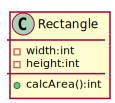

In [3]:
%%plantuml
@startuml
class Triangle {
    -width:int
    -height:int
    +Triangle(w:int, h:int)
    +computeArea():float
}
@enduml

In [11]:
class Triangle {
    private int width;
    private int height;
    public Triangle(int w, int h) {
        this.width=w;
        this.height=h;
    }
    public int getWidth() {
        return width;
    }
    public int getHeight() {
        return height;
    }
    public float computeArea() {
        return (float)(width*height)/2;
    }
}


 class Triangle {
     private int width;
     private int height;
     public Triangle(int w, int h) {
         this.width=w;
         this.height=h;
     }
     public int getWidth() {
         return width;
     }
     public int getHeight() {
         return height;
     }
     public float computeArea() {
         return (float)(width*height)/2;
     }
 }
|  Replaced class Triangle
|    Update replaced variable t, reset to null
|    Update replaced variable r, reset to null
|    Update overwrote class Triangle



In [12]:
Triangle t=new Triangle(3,4);
t.computeArea();

 Triangle t=new Triangle(3,4);
|  Modified variable t of type Triangle with initial value Triangle@10bdf5e5
|    Update overwrote variable t

 t.computeArea();
|  Expression value is: 6.0
|    assigned to temporary variable $23 of type float



* 삼각형의 너비, 높이를 변경하는 함수를 넣어 본다.

In [6]:
class Triangle {
    private int width;
    private int height;
    public Triangle(int w, int h) {
        this.width=w;
        this.height=h;
    }
    public int getWidth() {
        return width;
    }
    public int getHeight() {
        return height;
    }
    public void setHeight(int h) {
        height=h;
    }
    public void setWidth(int newWidth){
        width = newWidth;
    }
    public void setSize(int w, int h){
        setWidth(w);
        setHeight(h);
    }
    public float computeArea() {
        return (float)(width*height)/2;
    }
}


 class Triangle {
     private int width;
     private int height;
     public Triangle(int w, int h) {
         this.width=w;
         this.height=h;
     }
     public int getWidth() {
         return width;
     }
     public int getHeight() {
         return height;
     }
     public void setHeight(int h) {
         height=h;
     }
     public void setWidth(int newWidth){
         width = newWidth;
     }
     public void setSize(int w, int h){
         setWidth(w);
         setHeight(h);
     }
     public float computeArea() {
         return (float)(width*height)/2;
     }
 }
|  Replaced class Triangle
|    Update replaced variable r, reset to null
|    Update overwrote class Triangle



In [8]:
Triangle t=new Triangle(3,4);
t.computeArea();

 Triangle t=new Triangle(3,4);
|  Modified variable t of type Triangle with initial value Triangle@31a5c39e
|    Update overwrote variable t

 t.computeArea();
|  Expression value is: 6.0
|    assigned to temporary variable $14 of type float



In [10]:
Triangle t=new Triangle(3,4);
System.out.println("면적: "+t.computeArea());
t.setSize(4,5);
System.out.println("면적: "+t.computeArea());

 Triangle t=new Triangle(3,4);
|  Modified variable t of type Triangle with initial value Triangle@56ac3a89
|    Update overwrote variable t

 System.out.println("면적: "+t.computeArea());
면적: 6.0

 t.setSize(4,5);

 System.out.println("면적: "+t.computeArea());
면적: 10.0



실제 삼각형을 그려 보자. 화면 좌표 3개를 잡아서 그린다.
좌표 3개는 배열에 넣어 반복문으로 서로 연결한다.
좌표로 이동하는 **moveTo()**를 사용할 경우:
* **`java.awt.geom.Point2D.Double`**는 **(x,y)**로 묶어서 매개변수로 한다.
* 반면에 **`java.awt.Point`**는 **x,y**를 따로 매개변수로 한다.


In [ ]:
# %load src/com/sd/turtle/Triangle.java
/*
 * @author jsl
 * @since 20180408
 *
 * javac -sourcepath src/ -d classes/ -cp lib/aplu5.jar
 *   src/com/sd/turtle/Triangle.java 
 * java -cp ./classes/:./lib/aplu5.jar com.sd.turtle.Triangle
 */

package com.sd.turtle;
import ch.aplu.turtle.*;
import java.awt.Color;
//import java.awt.geom.Point2D.Double;
import java.awt.Point;

public class Triangle {
    static Point[] pts=new Point[3];
    //private Point p1;
    //private Point p2;
    //private Point p2;
    static Turtle pen;
    public Triangle(Point x, Point y, Point z) {
        pts[0] = x;
        pts[1] = y;
        pts[2] = z;
        pen = new Turtle();
        pen.setColor(Color.red);
        pen.setPenColor(Color.green);
    }
    public static void draw() {
        pen.penUp();
        pen.moveTo(pts[0].x, pts[0].y);
        pen.penDown();
        for (int i = 0; i < 3; i++)
            pen.moveTo(pts[i].x, pts[i].y);
        pen.moveTo(pts[0].x, pts[0].y);
    }
    public static void main(String[] args) {
        Point x=new Point(0,0);
        Point y=new Point(100,0);
        Point z=new Point(50,50);
        Triangle t = new Triangle(x, y, z);
        t.draw();
    }
}

